# Face Recognition with Dlib in Python

This notebook covers face recognition with Dlib for Python.

In [1]:
import dlib
import glob
import os
import gdown
import zipfile
import numpy as np
import bz2
import matplotlib.pyplot as plt

In [19]:
dlib.__version__

'19.20.0'

# Check prerequisites

In [2]:
def unzip_bz2_file(zipped_file_name):
    zipfile = bz2.BZ2File(zipped_file_name)
    data = zipfile.read()
    newfilepath = output[:-4] #discard .bz2 extension
    open(newfilepath, 'wb').write(data)

In [3]:
if os.path.isfile('shape_predictor_5_face_landmarks.dat') != True:
    print("shape_predictor_5_face_landmarks.dat is going to be downloaded")
    
    url = "http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2"
    output = url.split("/")[-1]
    gdown.download(url, output, quiet=False)
    
    unzip_bz2_file(output)

if os.path.isfile('dlib_face_recognition_resnet_model_v1.dat') != True:
    print("dlib_face_recognition_resnet_model_v1.dat is going to be downloaded")  
    
    url = "http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2"
    output = url.split("/")[-1]
    gdown.download(url, output, quiet=False)
    
    unzip_bz2_file(output)

# Load pre-trained models

In [4]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
facerec = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")

In [20]:
def plotPairs(img1, img2):
    fig = plt.figure()

    ax1 = fig.add_subplot(1,2,1)
    plt.imshow(img1)
    plt.axis('off')

    ax1 = fig.add_subplot(1,2,2)
    plt.imshow(img2)
    plt.axis('off')

    plt.show()

In [26]:
threshold = 0.6 #distance threshold declared in dlib docs for 99.38% confidence score on LFW data set

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [34]:
def verify(img1_path, img2_path):
    img1 = dlib.load_rgb_image(img1_path)
    img2 = dlib.load_rgb_image(img2_path)
    
    """
    print("Raw images: ")
    plotPairs(img1, img2)
    """
    
    #------------------------------------
    #face detection and alignment
    
    img1_detection = detector(img1, 1)
    img2_detection = detector(img2, 1)
    
    if len(img1_detection) == 0:
        raise ValueError("no face detected in img1")

    if len(img2_detection) == 0:
        raise ValueError("no face detected in img2")
    
    img1_shape = sp(img1, img1_detection[0])
    img2_shape = sp(img2, img2_detection[0])
    
    img1_aligned = dlib.get_face_chip(img1, img1_shape)
    img2_aligned = dlib.get_face_chip(img2, img2_shape)
    
    print("Deteted and aligned faces:")
    plotPairs(img1_aligned, img2_aligned)
    
    #-----------------------------------
    #representation
    
    img1_representation = facerec.compute_face_descriptor(img1_aligned)
    img2_representation = facerec.compute_face_descriptor(img2_aligned)
    
    img1_representation = np.array(img1_representation)
    img2_representation = np.array(img2_representation)
    
    #-----------------------------------
    #verification
    
    distance = findEuclideanDistance(img1_representation, img2_representation)
    
    print("Distance is ", distance," whereas threshold is ", threshold)
    
    if distance < 0.6: 
        print(img1_path," and ",img2_path," are same person")
        verified = True
    else:
        print(img1_path," and ",img2_path," are different person")
        verified = False
    
    return verified

Deteted and aligned faces:


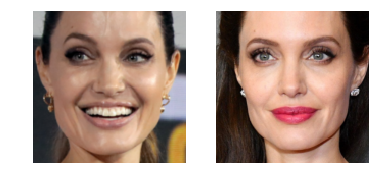

Distance is  0.37006729644671527  whereas threshold is  0.6
deepface/tests/dataset/img1.jpg  and  deepface/tests/dataset/img2.jpg  are same person


True

In [35]:
verify("deepface/tests/dataset/img1.jpg", "deepface/tests/dataset/img2.jpg")

Deteted and aligned faces:


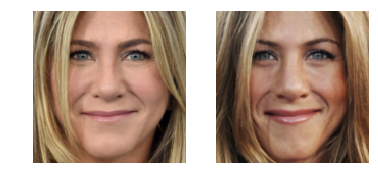

Distance is  0.4876102654107553  whereas threshold is  0.6
deepface/tests/dataset/img3.jpg  and  deepface/tests/dataset/img54.jpg  are same person


True

In [38]:
verify("deepface/tests/dataset/img3.jpg", "deepface/tests/dataset/img54.jpg")

Deteted and aligned faces:


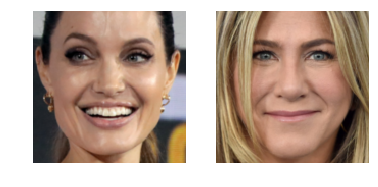

Distance is  0.8407803789003236  whereas threshold is  0.6
deepface/tests/dataset/img1.jpg  and  deepface/tests/dataset/img3.jpg  are different person


False

In [36]:
verify("deepface/tests/dataset/img1.jpg", "deepface/tests/dataset/img3.jpg")

Deteted and aligned faces:


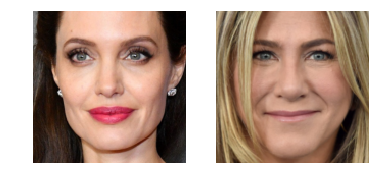

Distance is  0.8376631517186875  whereas threshold is  0.6
deepface/tests/dataset/img2.jpg  and  deepface/tests/dataset/img3.jpg  are different person


False

In [37]:
verify("deepface/tests/dataset/img2.jpg", "deepface/tests/dataset/img3.jpg")

Deteted and aligned faces:


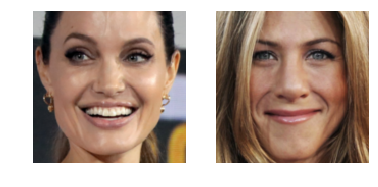

Distance is  0.8451802719780849  whereas threshold is  0.6
deepface/tests/dataset/img1.jpg  and  deepface/tests/dataset/img54.jpg  are different person


False

In [39]:
verify("deepface/tests/dataset/img1.jpg", "deepface/tests/dataset/img54.jpg")

Deteted and aligned faces:


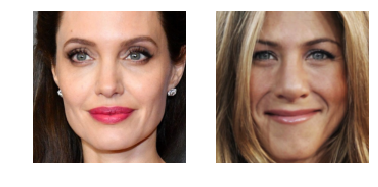

Distance is  0.831164977216903  whereas threshold is  0.6
deepface/tests/dataset/img2.jpg  and  deepface/tests/dataset/img54.jpg  are different person


False

In [40]:
verify("deepface/tests/dataset/img2.jpg", "deepface/tests/dataset/img54.jpg")